# Statistics fundamentals

Statistics is used in many parts of the data science workflow. As a reminder here is the data science workflow:
1. Data collection and storage
    - Sampling techniques are used to obtain indicative data e.g. random, stratified, systematic.
2. Data preparation
    - Imputation on missing data using statisical methods
3. Exploration and visualisation
    - Descriptive statistics (mean, median and mode) to summarise data
    - Visualisation of data
    - Statistical tests to detect patterns e.g. t-tests, ANOVA and chi-square
4. Experimentation and prediction
    - Model making: Using statistical distribution to make model e.g. normal, poisson and binomial
    - Model evaluation: metrics of model accuracy, precision and f1 score
    - Hypothesis testing e.g. p-values, confidence intervals to assess model performance
5. Data storytelling and communication



In [65]:
import os
import pandas as pd
import numpy as np
from statistics import mean, median, mode, stdev

# Import iris flower dataset
columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'] 
data =pd.read_csv(os.path.dirname(os.getcwd())+'/machine_learning/iris/Iris.csv',names=columns)

# Print the first few rows
print(data.head())

# Get summary statistics for numerical columns
num_cols = data.select_dtypes(include=[np.number]).columns
print("\nSummary Statistics for Numerical Columns:")
for col in num_cols:
    col_data = data[col].dropna()  # Drop NaN values
    print(f"\n{col}:")
    print(f"Mean: {mean(col_data)}")
    print(f"Median: {median(col_data)}")
    print(f"Mode: {mode(col_data)}")
    print(f"Standard Deviation: {stdev(col_data)}")

# Get value counts for categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
print("\nValue Counts for Categorical Columns:")
for col in cat_cols:
    print(f"\n{col}:")
    print(data[col].value_counts())

data.describe()

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Summary Statistics for Numerical Columns:

sepal length:
Mean: 5.843333333333334
Median: 5.8
Mode: 5.0
Standard Deviation: 0.8280661279778629

sepal width:
Mean: 3.054
Median: 3.0
Mode: 3.0
Standard Deviation: 0.43359431136217363

petal length:
Mean: 3.7586666666666666
Median: 4.35
Mode: 1.5
Standard Deviation: 1.7644204199522626

petal width:
Mean: 1.1986666666666668
Median: 1.3
Mode: 0.2
Standard Deviation: 0.7631607417008411

Value Counts for Categorical Columns:

class:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data visualisation
Data visualisation is an important part of data science, it’s how you can communicate the data to others, as well as giving you another way to dicipher the data.

A key part of data visualisation is selecting the right type of plot for the task at hand. Here are some of the major types of plots and where you should use them:

- **Relationship plots:** allows you to see relationships between different variables. Examples are: scatter plots and line plots

- **Comparison plots:** allows you to compare size of components. Examples are: bar charts and pie charts

- **Distribution plots:** allows you to see how a variable is distributed. Examples are: histograms and box plots

- **Spatial plots:** allows you to analyse data with a spatial component. Examples are: geographic maps and heat maps

- **Time plots:** allows you to see trends over time. Examples are: time series plot





### Relationship plot

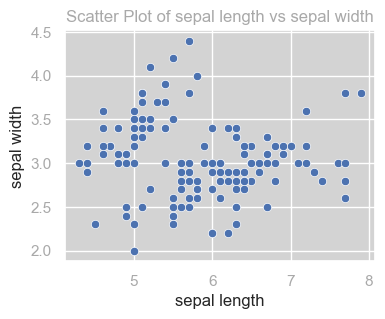

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom theme
sns.set_theme(style='darkgrid', rc={'axes.facecolor': 'lightgray',
                                    'figure.facecolor': 'white',
                                    'text.color': 'darkgray',
                                    'xtick.color': 'darkgray',
                                    'ytick.color': 'darkgray'})

# Scatter Plot
plt.figure(figsize=(4, 3))
sns.scatterplot(data=data, x='sepal length', y='sepal width')
plt.title('Scatter Plot of sepal length vs sepal width')
plt.show()

### Comparison plot

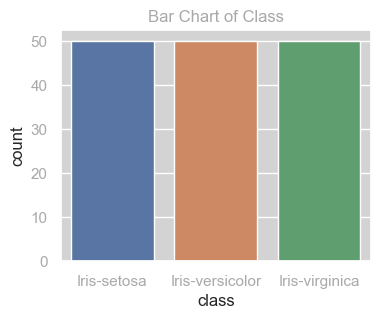

In [67]:
# Bar Chart
plt.figure(figsize=(4, 3))
sns.countplot(data=data, x='class')
plt.title('Bar Chart of Class')
plt.show()

### Distribution plot

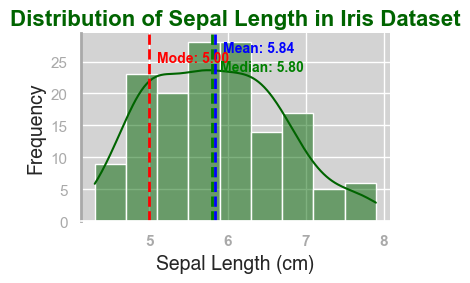

In [68]:
# Histogram

# Create figure and axes
fig, ax = plt.subplots(figsize=(4, 3))

# Plot histogram with KDE
sns.histplot(data=data, x='sepal length', kde=True, ax=ax, color='darkgreen')

# Add axis labels
ax.set_xlabel('Sepal Length (cm)', fontsize=14, fontweight='bold', fontfamily='Helvetica')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold', fontfamily='Helvetica')

# Rotate x-axis tick labels
plt.xticks(color='darkgray', fontweight='bold')

# Customize axis lines
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_color('darkgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize ticks
ax.tick_params(axis='both', which='major', length=6, color='darkgray', width=2)

# Add title
ax.set_title('Distribution of Sepal Length in Iris Dataset', fontsize=16, fontweight='bold', color='darkgreen')

# Calculate mean, mode, median, and std
mean = data['sepal length'].mean()
mode = data['sepal length'].mode()[0]
median = data['sepal length'].median()

# Add mean vertical line and annotation
ax.axvline(x=mean, color='blue', linestyle='--', linewidth=2)
ax.text(mean + 0.1, ax.get_ylim()[1] * 0.9, f'Mean: {mean:.2f}', fontsize=10, fontweight='bold', color='blue')

# Add mode vertical line and annotation
ax.axvline(x=mode, color='red', linestyle='--', linewidth=2)
ax.text(mode + 0.1, ax.get_ylim()[1] * 0.85, f'Mode: {mode:.2f}', fontsize=10, fontweight='bold', color='red')

# Add median vertical line and annotation
ax.axvline(x=median, color='green', linestyle='--', linewidth=2)
ax.text(median + 0.1, ax.get_ylim()[1] * 0.8, f'Median: {median:.2f}', fontsize=10, fontweight='bold', color='green')

# Adjust spacing
plt.tight_layout()

# Display the plot
plt.show()

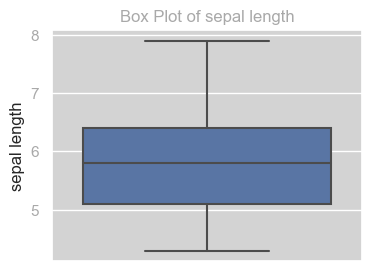

In [69]:
# Box plot
plt.figure(figsize=(4, 3))
sns.boxplot(data=data, y='sepal length')
plt.title('Box Plot of sepal length')
plt.show()

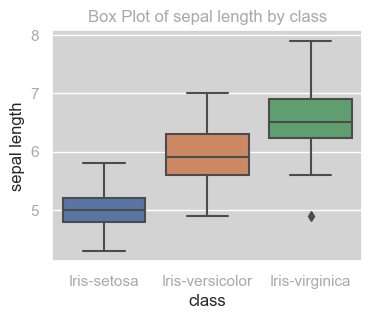

In [70]:
# Box plot by class
plt.figure(figsize=(4, 3))
sns.boxplot(data=data, x='class', y='sepal length')
plt.title('Box Plot of sepal length by class')
plt.show()

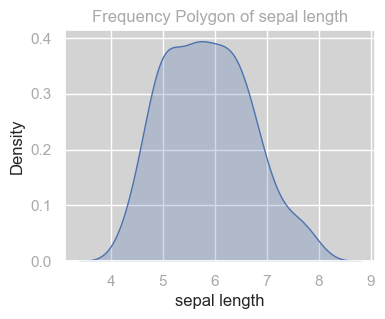

In [71]:
# Frequency Polygon
plt.figure(figsize=(4, 3))
sns.kdeplot(data=data['sepal length'], fill=True)
plt.title('Frequency Polygon of sepal length')
plt.show()

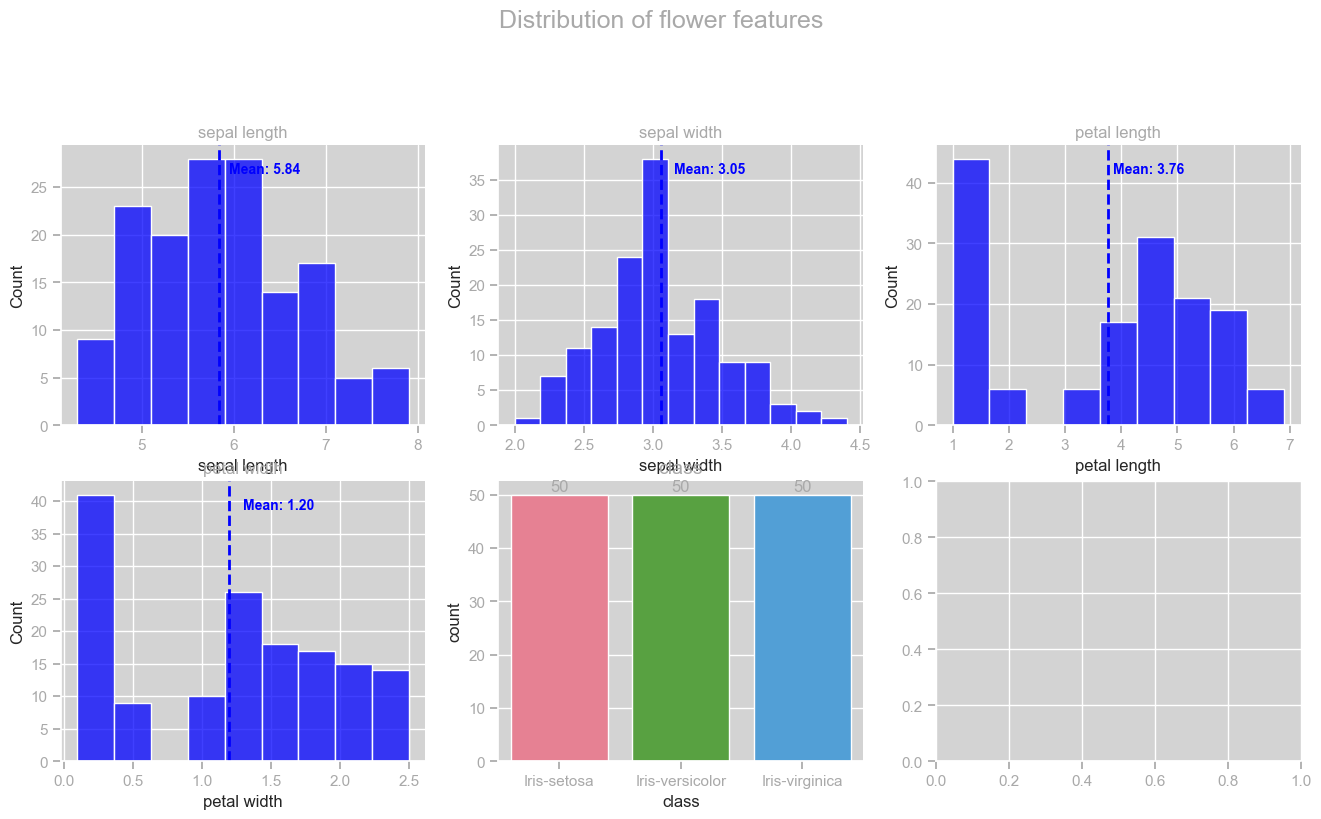

In [72]:
# sub plots
from pandas.api.types import is_numeric_dtype

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()

# Remove the top and right spines and ticks.
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

for i, col in enumerate(data.columns):
    ax = axes[i]
    fig.suptitle('Distribution of flower features', fontsize=18, y=1.05)
    if is_numeric_dtype(data[col]):
        sns.histplot(data=data, x=col, ax=ax, color='blue')
        ax.set_title(col, fontsize=14)  # Increase font size for titles
        ax.set_xlabel(col, fontsize=12)  # Add x-axis label
        ax.set_title(col)
        mean = data[str(col)].mean()
        ax.axvline(x=mean, color='blue', linestyle='--', linewidth=2)
        ax.text(mean + 0.1, ax.get_ylim()[1] * 0.9, f'Mean: {mean:.2f}', fontsize=10, fontweight='bold', color='blue')
    elif not is_numeric_dtype(data[col]):
        palette = sns.color_palette("husl", n_colors=len(data[col].unique()))
        sns.countplot(data=data, x=col, ax=ax, palette=palette)
        ax.set_title(col, fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        for container in ax.containers:
            ax.bar_label(container, fmt='%.0f')

plt.show()


